In [ ]:
#Stock Market Analysis with Time series prediction with ARIMA Model


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

<ipython-input-1-105718a65f17>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
#Import the Data
path="/stockdata.csv"
#/content/stockdata.csv
df = pd.read_csv("/content/stockdata.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,148.509995,149.960007,140.960007,143.149994,143.099075,40127700
1,2023-01-04,145.669998,148.529999,142.410004,147.490005,147.437561,43132400
2,2023-01-05,144.910004,145.639999,141.479996,142.649994,142.599274,38916800
3,2023-01-06,144.740005,150.100006,140.339996,148.589996,148.537155,40504400
4,2023-01-09,152.839996,160.559998,151.410004,156.279999,156.224411,50423100


In [ ]:
print(df.head())
print(df.shape)
print(df.columns)

         Date        Open        High         Low       Close   Adj Close  \
0  2023-01-03  148.509995  149.960007  140.960007  143.149994  143.099075   
1  2023-01-04  145.669998  148.529999  142.410004  147.490005  147.437561   
2  2023-01-05  144.910004  145.639999  141.479996  142.649994  142.599274   
3  2023-01-06  144.740005  150.100006  140.339996  148.589996  148.537155   
4  2023-01-09  152.839996  160.559998  151.410004  156.279999  156.224411   

     Volume  
0  40127700  
1  43132400  
2  38916800  
3  40504400  
4  50423100  
(218, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.dropna(inplace=True)

Exploratory Data Analysis

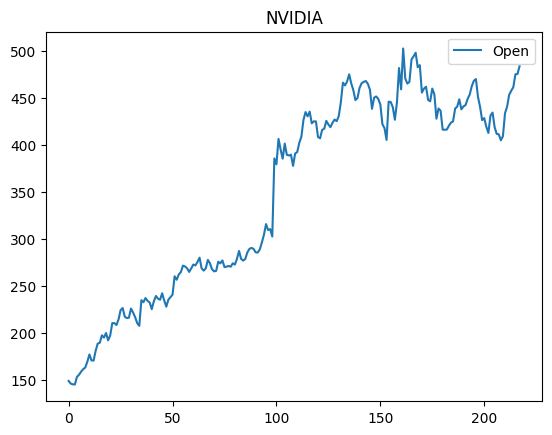

In [ ]:
df[['Open']].plot()
plt.title("NVIDIA")
plt.show()

Text(0.5, 1.0, 'NVIDIA Autocorrelation plot')

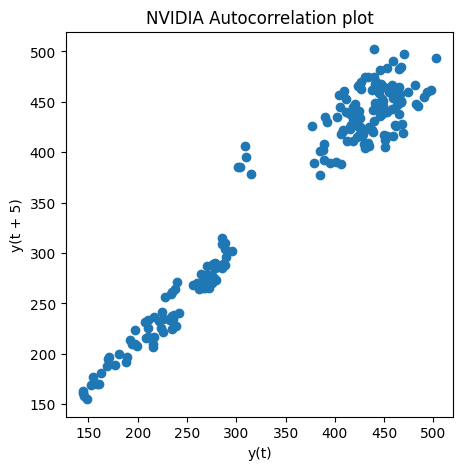

In [ ]:
plt.figure(figsize=(5,5))
lag_plot(df['Open'], lag=5)
plt.title('NVIDIA Autocorrelation plot')

Text(0.5, 1.0, 'NVIDIA Cumulative Returns')

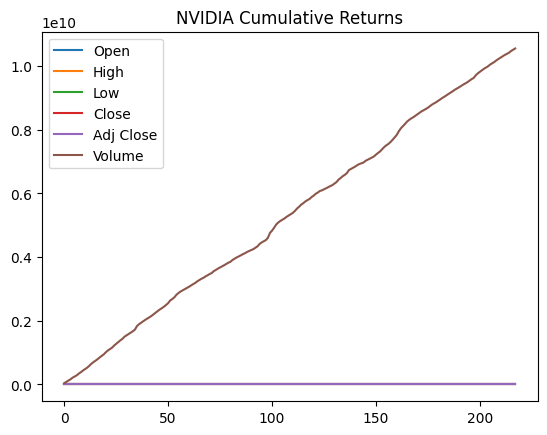

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('NVIDIA Cumulative Returns')

Model Development

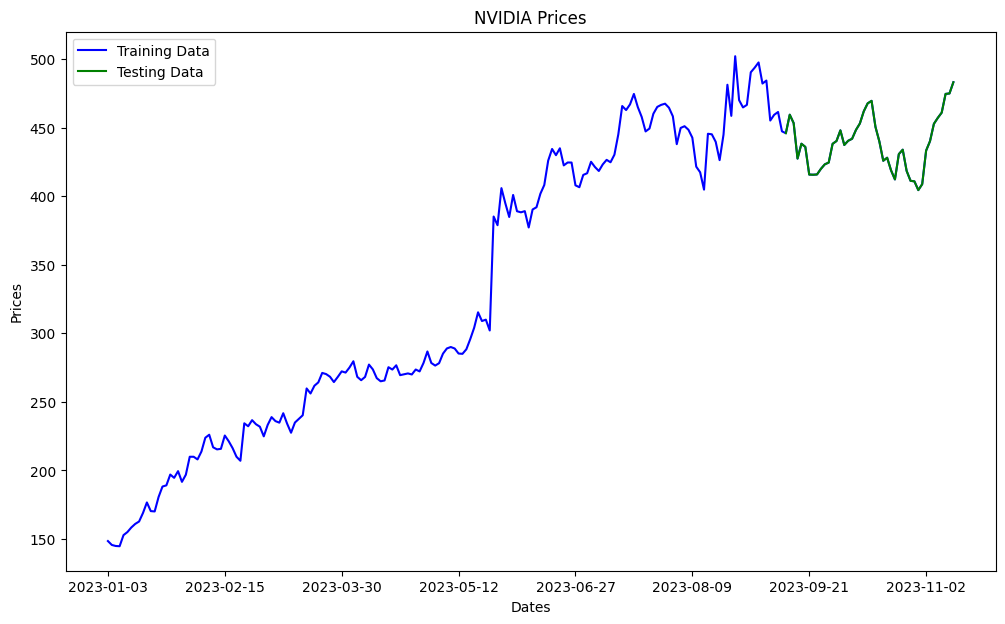

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('NVIDIA Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,218, 30), df['Date'][0:218:30])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = sm.tsa.arima.ARIMA(history,order=(5,1,0))
    #model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 130.297
Symmetric mean absolute percentage error: 2.034


<ipython-input-25-93a50344041b>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'green', color='blue', label='Training Data')


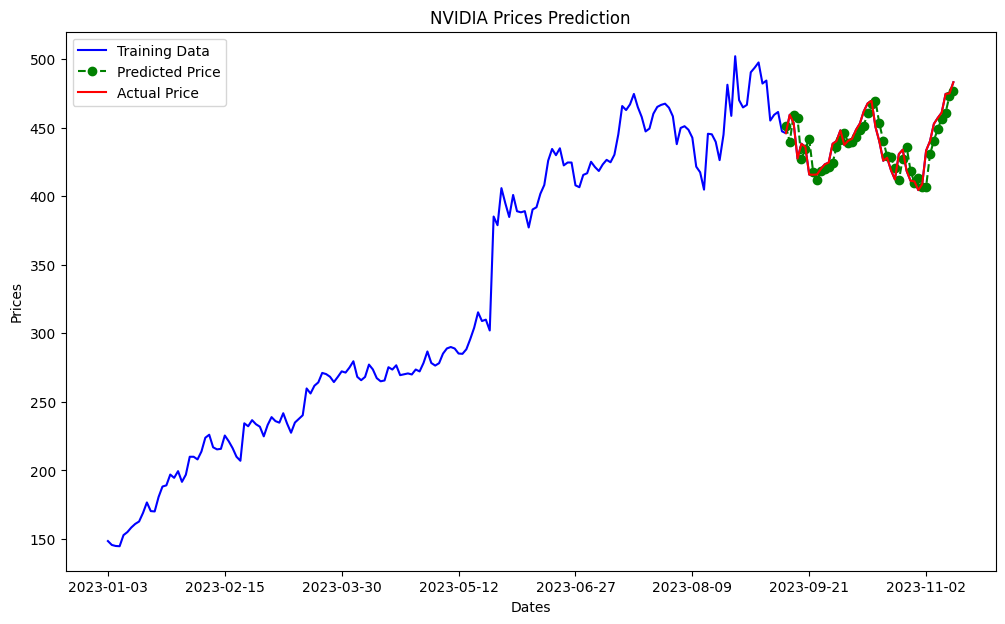

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('NVIDIA Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,218, 30), df['Date'][0:218:30])
plt.legend()

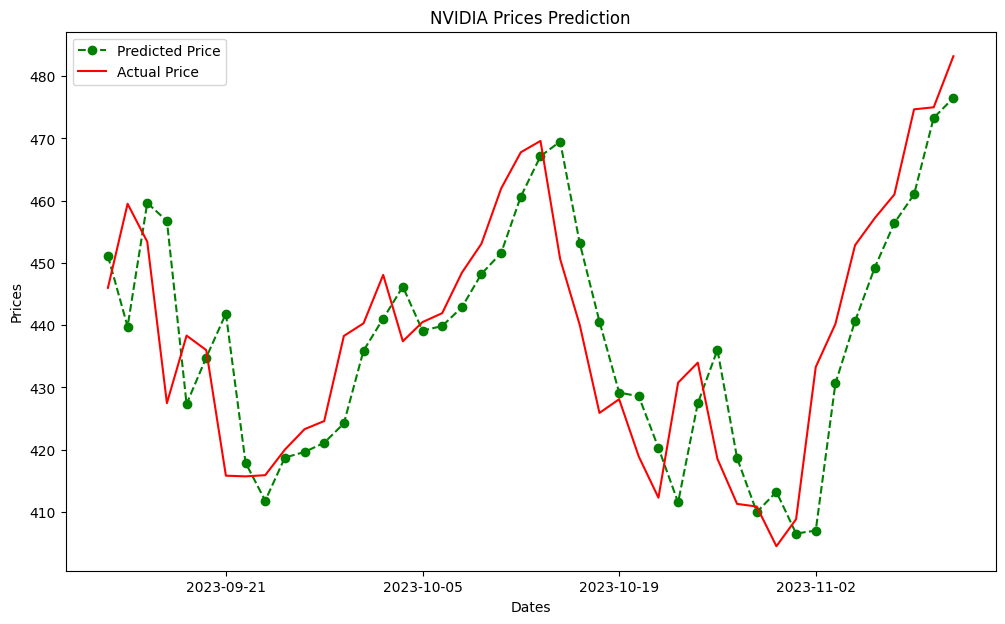

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(180,218, 10), df['Date'][180:218:10])
plt.title('NVIDIA Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()